# **Problem Statement**
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

Here we are building a classification model using a dataset collected by Behavioral Risk Factor Surveillance System (BRFSS) of CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used to identify whether a person is at risk of diabetes or not.

# **Objective:**
To build a model to predict whether an individual is at risk of diabetes or not.

# **Data Description:**

1. Diabetic - Target variable 1-diabetic, 0-not diabetic
2. HighBP - 0-no high BP, 1-high BP
3. HighChol - 0-no high cholesterol, 1-high cholesterol
4. CholCheck - 0-no cholesterol check for 5 yrs, 1-yes cholesterol check in 5 yrs
5. BMI - Body Mass Index
6. Smoker - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0-no, 1-yes
7. Stroke - (Ever told) you had a stroke. 0-no, 1-yes
8. HeartDiseaseorAttack - coronary heart disease (CHD) or myocardial infarction (MI) 0-no, 1-yes
9. PhysActivity - physical activity in past 30 days - not including job 0-no, 1 -yes
10. Fruits - Consume Fruit one or more times per day 0-no, 1-yes
11. Veggies - Consume Vegetables 1 or more times per day 0-no, 1-yes
12. HvyAlcoholConsump - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per
13. AnyHealthcare - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0-no, 1-yes
14. NoDocbcCost - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0-no, 1-yes
15. GenHlth - Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. MentHlth - Now thinking about your mental health, which includes stress, depression, and problems with emotions
17. PhysHlth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical
18. iffWalk - Do you have serious difficulty walking or climbing stairs? 0-no, 1-yes
19. Sex - 0-female, 1-male
20. Age - 1 = 18-24, 9 = 60-64, 13 = 80 or older
21. Education - 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
22. Income Income scale 1- <$10,000, 5- <$35,000, 8- $75,000 or more


## **Importing necessary libraries**

In [ ]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes_binary_health_indicators_BRFSS2015.csv")

In [ ]:
# make a copy of the dataset
data = df.copy()
data.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


### Understand the shape of the dataset.

In [ ]:
print("The dataset has", data.shape[0], "rows and", data.shape[1], "columns")

The dataset has 253680 rows and 22 columns


### Check the data types of the columns for the dataset.

In [ ]:
# data types and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetic              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

Observations: There are no null values and all the variables are type integer

### Check the statistical summary

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetic,253680.000,0.139,0.346,0.000,0.000,0.000,0.000,1.000
HighBP,253680.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
HighChol,253680.000,0.424,0.494,0.000,0.000,0.000,1.000,1.000
CholCheck,253680.000,0.963,0.190,0.000,1.000,1.000,1.000,1.000
BMI,253680.000,28.382,6.609,12.000,24.000,27.000,31.000,98.000
Smoker,253680.000,0.443,0.497,0.000,0.000,0.000,1.000,1.000
Stroke,253680.000,0.041,0.197,0.000,0.000,0.000,0.000,1.000
HeartDiseaseorAttack,253680.000,0.094,0.292,0.000,0.000,0.000,0.000,1.000
PhysActivity,253680.000,0.757,0.429,0.000,1.000,1.000,1.000,1.000
Fruits,253680.000,0.634,0.482,0.000,0.000,1.000,1.000,1.000


### Check the missing values and duplicates

In [ ]:
# checking for missing values
data.isnull().sum()

Diabetic                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# checking for duplicates
data.duplicated().sum()

24206

In [ ]:
# let's drop the duplicated rows
data = data.drop_duplicates()

In [ ]:
# check the shape of the dataset after dropping duplicates
data.shape

(229474, 22)

### Exploratory Data Analysis

**For the detailed EDA, Appendix Section can be referred.**

*   EDA is an important part of any project involving data.
*   It is important to investigate and understand the data better before building a model with it.

## **Univariate analysis**

#### functions for plots

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### **Summary of EDA**

**Univariate Analysis**

1. The target “Diabetic” attribute is imbalanced, 84.7% people are not diabetic and 15.3% are diabetic.

2. 45.4% of people have high blood pressure.

3. 44.2% of people have high cholesterol.

4. Only 4.1% of people didn’t check cholesterol within the last 5 years.

5. 46.6% of the people are smokers.

6. Only 4.5% of people have had a stroke.

7. Only 10.3% had a heart disease or heart attack.

8. 73.3% showed physical activity in the past 30 days.

9. 61.3% of people consume fruits one or more times a day.

10. 79.5% of people consume veggies one or more times a day.

11. Only 6.1% of people are heavy alcohol users.

12. 94.6% of people have any kind of health care coverage.

13. 9.3% of the people needed to see a doctor but could not because of cost.

14. Only 15.2% of people describe they are in excellent health(1), 33.7% say very good health (2), 32.1% say good health (3), 13.7% say fair health (4) and 5.3% say poor health (5).

15. 18.6% of people have serious difficulty walking or climbing stairs.

16. 43.9% of people are males.

17. 7.3% of people are 80 or older (13), 2.4% of people are age 18-24 years old (1)

18. 38.4% of people went to college 4 years or more, 29% of people went to college 3 years, 26.6% of people are high school graduates.

19. 31.2% of people have income $75,000 or more and 4.3% of people have income less than  $10,000

20. BMI is right skewed. There are many outliers.

21. Mental health is right skewed, and there are many outliers.

22. Physical health is again right skewed and there are many outliers.

**Heatmap Observations:**

There is a moderate correlation between;
1. GenHlth and PhysHlth (r2 = 0.52)
2. GenHlth and iffWalk (r2 = 0.45)
3. PhysHlth and iffWalk (r2 = 0.47)
4. Education and income (r2 = 0.42)
5. No multicollinearity

**Pairplot Observations:**

There are no significant pattern exist between the target and BMI, MentHlth, PhysHlth

**Bivariate Anlysis**

1. People with high BP have a high chance of having diabetes.

2. People with high cholesterol have a high chance of having diabetes.

3. Percentage of diabetes is high among people who are smoking compared to non-smoking.

4. Percentage of Diabetes in people who had a stroke is higher than the group that didn’t have a stroke.

5. Percentage of Diabetes in people who have a heart disease or had a heart attack is higher than the group that didn’t have a heart condition.

6. Percentage of Diabetes in people who didn’t have physical activity in the last 30 days is higher.

7. People who don't eat fruits/veggies have a higher chance of diabetes.

8. Heavy alcohol users have a less chance of having diabetes.

9. Having any health care coverage does not directly influence having diabetes. It is slightly higher for those who have coverage.

10. If the general health is poor (5), they have a higher chance of having diabetes.

11. People who have difficulty in walking have a greater chance of having diabetes.
12. Males (1) do have a slightly higher chance of having diabetes.

13. As the age increases so does diabetes (age group 11 is older than group 1).

14. People with higher education qualifications have less diabetes compared to lower education groups.

15. As income increases, diabetes decreases, that means rich people have less diabetes than poor.

16. BMI is higher for the people who have diabetes, compared to those who don’t have diabetes.

17. MentHlth and PhysHlth have a wide range for people with diabetes.



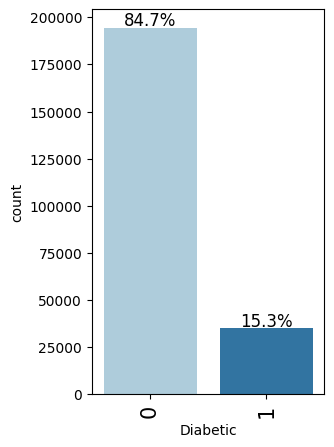

In [ ]:
labeled_barplot(data, 'Diabetic')

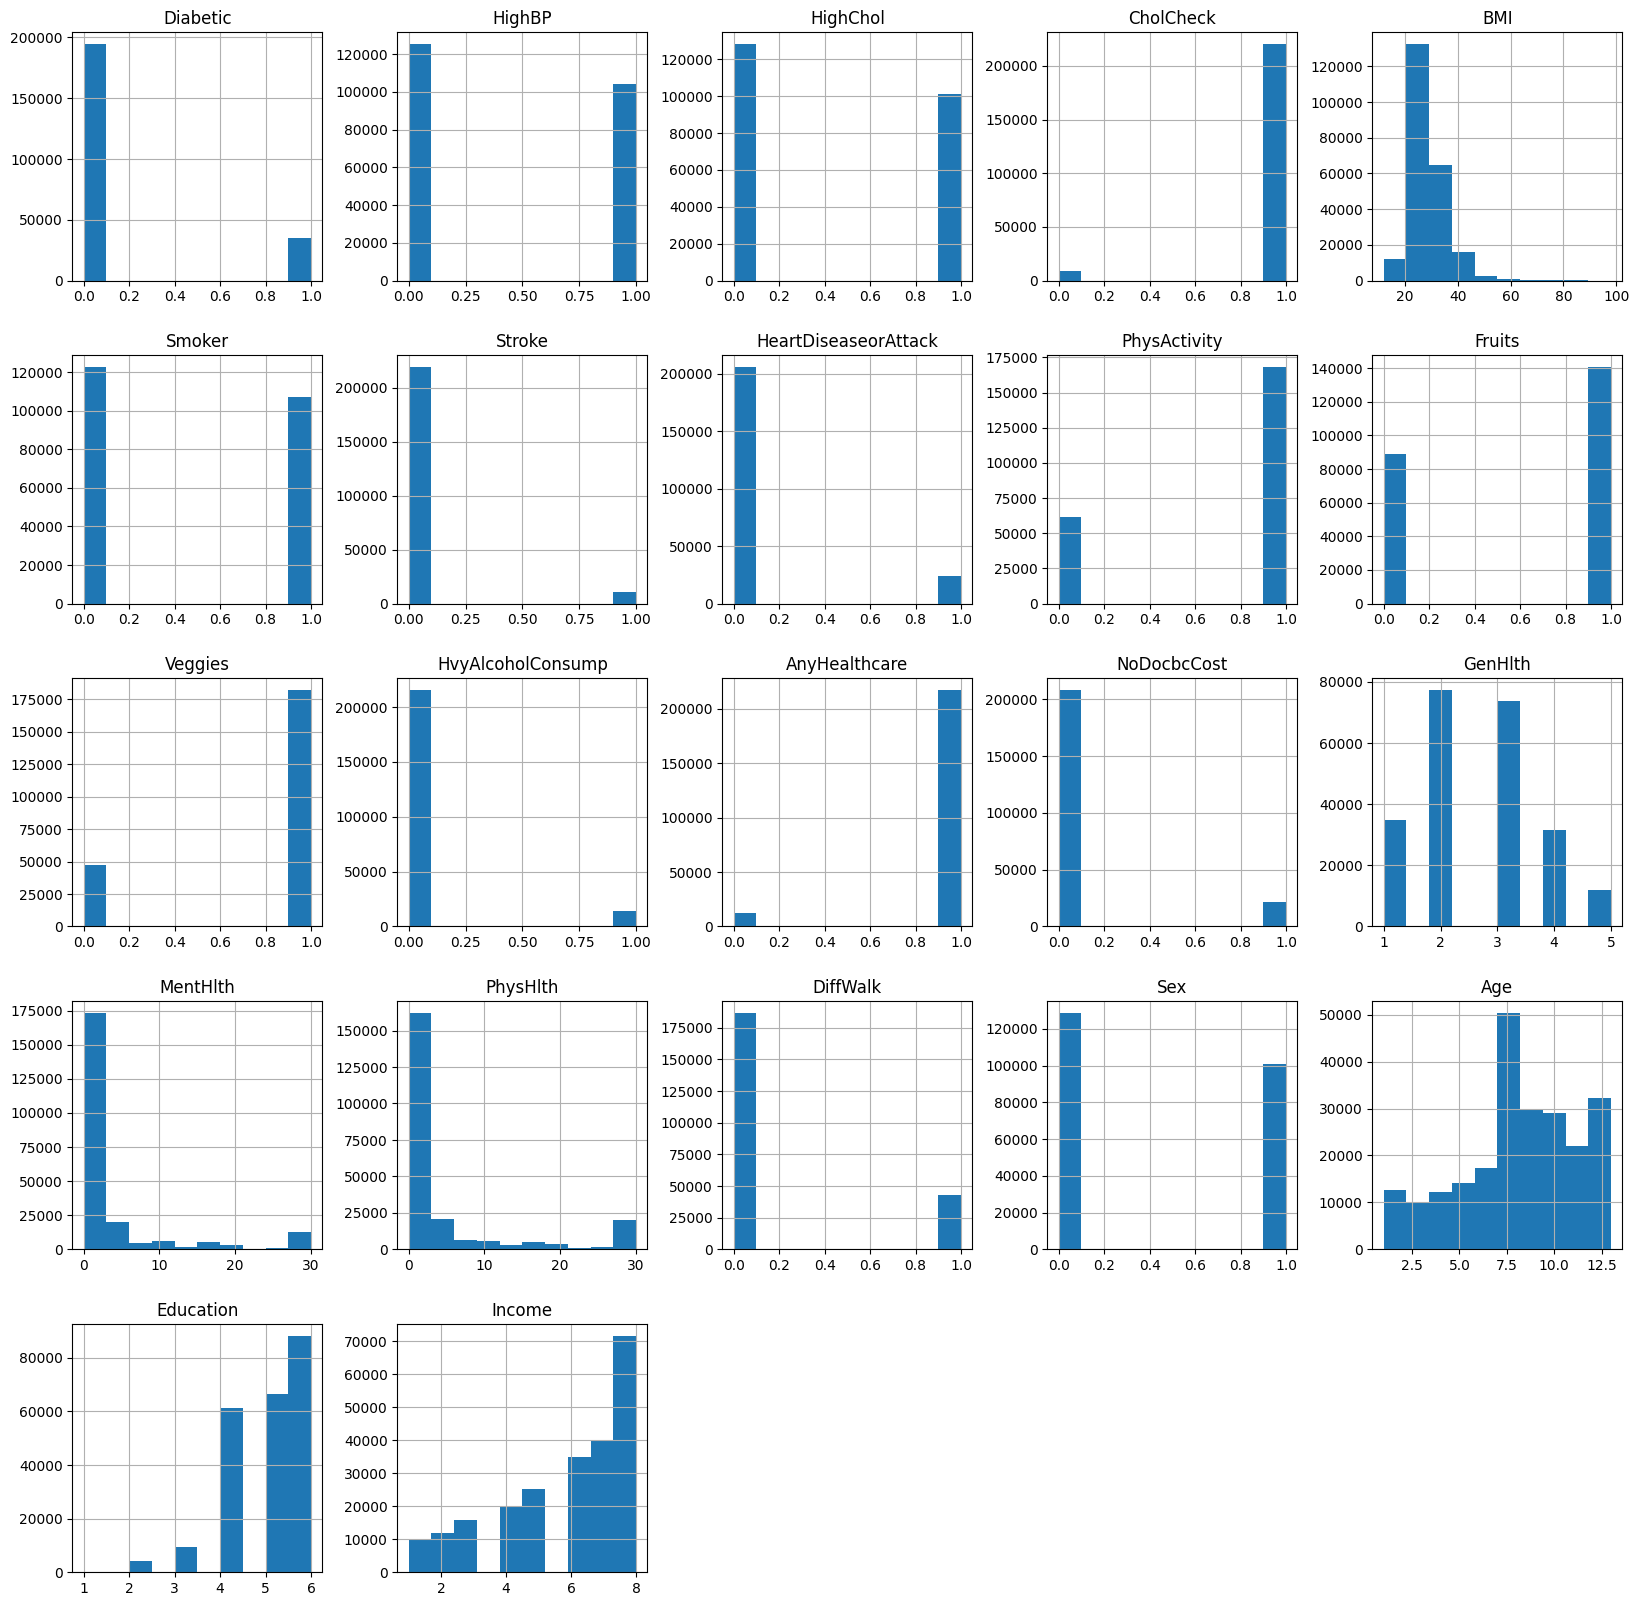

In [ ]:
# creating histograms
data.hist(figsize=(20, 20))
plt.show()

#### Summary of Bivariate Analysis with Target 'Diabetic'

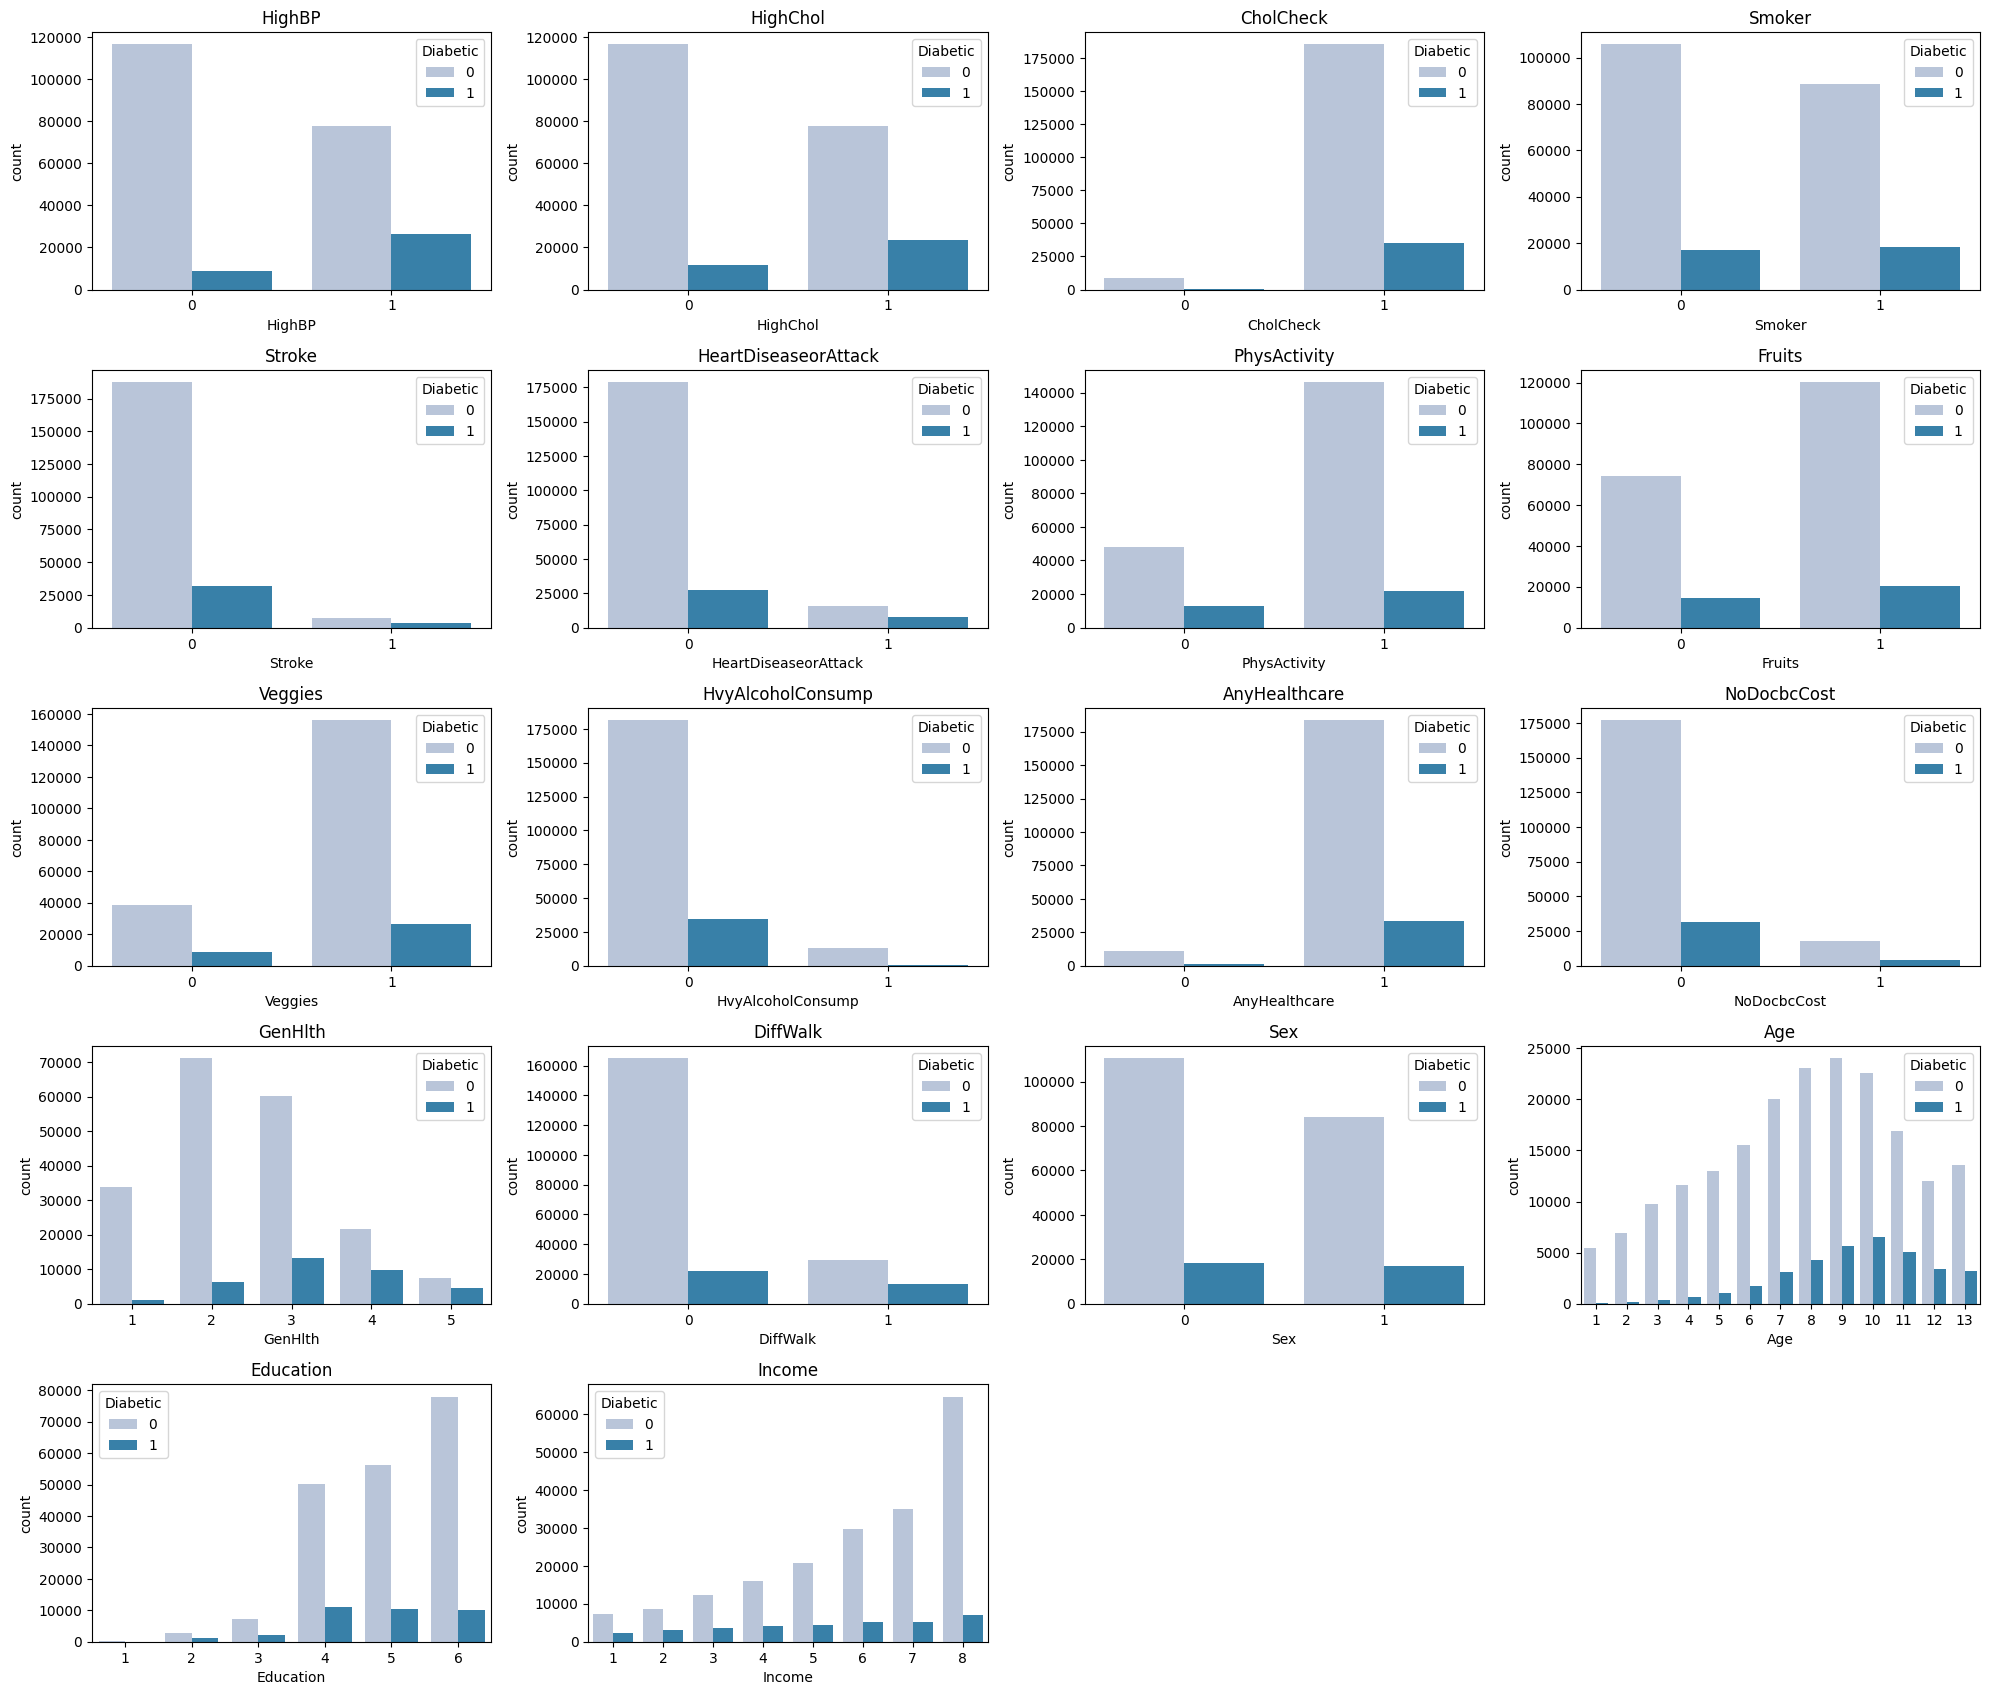

In [ ]:
cols = data[['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk',
       'Sex', 'Age', 'Education',
       'Income']].columns.tolist()
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(6,4,i+1)
                     sns.countplot(data=data,hue="Diabetic",x=variable,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

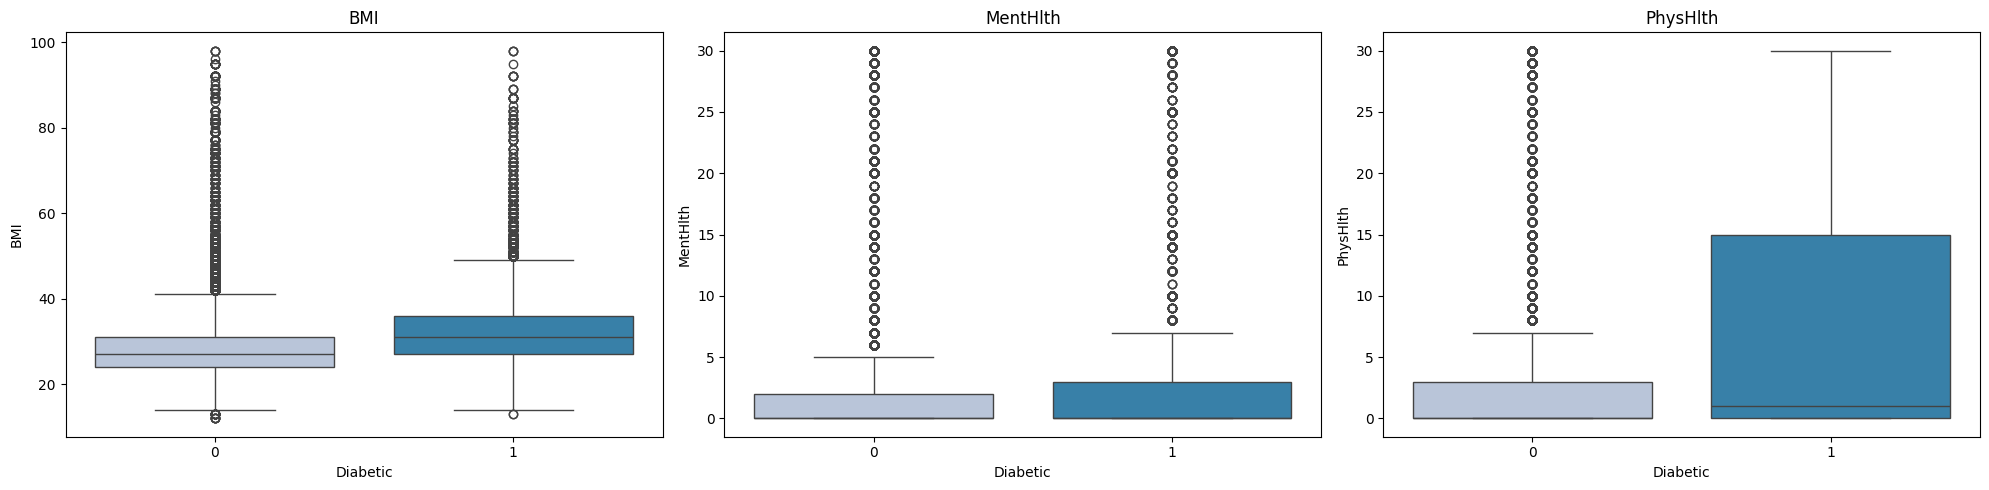

In [ ]:
cols = data[['BMI','MentHlth', 'PhysHlth']].columns.tolist()
plt.figure(figsize=(20,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data=data,x="Diabetic",y=variable,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### **Fixing the data types for modeling**

In [ ]:
# Convert the attributes include categories from integer to category data type.
# As numerics in categories do not add any meaningful information to the model, we have to convert them into categories.
cols = data[['Diabetic', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]
cols.columns

Index(['Diabetic', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
# converting 'integers' to 'category'
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
# Make sure the data has been converted properly, check the data types in each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetic              229474 non-null  category
 1   HighBP                229474 non-null  category
 2   HighChol              229474 non-null  category
 3   CholCheck             229474 non-null  category
 4   BMI                   229474 non-null  int64   
 5   Smoker                229474 non-null  category
 6   Stroke                229474 non-null  category
 7   HeartDiseaseorAttack  229474 non-null  category
 8   PhysActivity          229474 non-null  category
 9   Fruits                229474 non-null  category
 10  Veggies               229474 non-null  category
 11  HvyAlcoholConsump     229474 non-null  category
 12  AnyHealthcare         229474 non-null  category
 13  NoDocbcCost           229474 non-null  category
 14  GenHlth               229474 non-null  ca

## **Model Building**

### **Split Data**

In [ ]:
# separating the independent and dependent variables
X = data.drop(["Diabetic"], axis=1)
y = data["Diabetic"]

# creating dummy variables for non-integer attributes
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(112441, 45) (48190, 45) (68843, 45)


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set
print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Diabetic
0   0.847
1   0.153
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Diabetic
0   0.847
1   0.153
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Diabetic
0   0.847
1   0.153
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Diabetic
0   0.847
1   0.153
Name: proportion, dtype: float64
********************************************************************************


### **Model Evaluation Criterion**

**Model can make wrong predictions as:**
Predicting a person has diabetes but he doesn't
Predicting a person doesn't have diabetes but in reality he has diabetes

**What do we need?**
We want to identify all possible cases that can have diabetes and treat them. So we have to minimize the false negatives.

**Since we want to reduce false negatives we should use Recall as a metric of model evaluation instead of accuracy.**
Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a person with diabetes as not.

#### Functions to compute different metrics

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### **Building several classification models with default parameters**

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

In [ ]:
# As target's classes are highly imbalanced, accuracy is not a good metric for model evalution.
# Therefore let's concentrate on recall and see how accuracy changes in general.
print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    #scores = recall_score(y_train, model.predict(X_train))
    print("Accuracy: {}: {}".format(name, accuracy_score(y_train, model.predict(X_train))))
    print("Recall: {}: {}".format(name, recall_score(y_train, model.predict(X_train))))
    # print("Precision: {}: {}".format(name, precision_score(y_train, model.predict(X_train))))
    # print("F1_score: {}: {}".format(name, f1_score(y_train, model.predict(X_train))))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    #scores_val = recall_score(y_val, model.predict(X_val))
    print("Accuracy: {}: {}".format(name, accuracy_score(y_val, model.predict(X_val))))
    print("Recall: {}: {}".format(name, recall_score(y_val, model.predict(X_val))))
    # print("Precision: {}: {}".format(name, precision_score(y_val, model.predict(X_val))))
    # print("F1_score: {}: {}".format(name, f1_score(y_val, model.predict(X_val))))


Training Performance:

Accuracy: dtree: 0.996851682215562
Recall: dtree: 1.0
Accuracy: Bagging: 0.9795270408480892
Recall: Bagging: 0.8839913938477642
Accuracy: Random forest: 0.996807214450245
Recall: Random forest: 0.9988951561318835
Accuracy: GBM: 0.854039007123736
Recall: GBM: 0.1629935453858231
Accuracy: Adaboost: 0.851957915706904
Recall: Adaboost: 0.18916090015700412

Validation Performance:

Accuracy: dtree: 0.781863457148786
Recall: dtree: 0.2945326278659612
Accuracy: Bagging: 0.8365636024071385
Recall: Bagging: 0.14909781576448244
Accuracy: Random forest: 0.8449263332641627
Recall: Random forest: 0.1339031339031339
Accuracy: GBM: 0.8539738534965761
Recall: GBM: 0.1588658255324922
Accuracy: Adaboost: 0.8516082174725047
Recall: Adaboost: 0.1891195224528558


**Observations:** We can see clear overfitting of the models on training data (if the models are generalized the difference between training and validation should be quite less). Therefore we can try oversampling, undersampling and then do hyperparameter tuning.

### **Model Building - Oversampled Data**

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=0.6, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 17197
Before Oversampling, counts of label 'No': 95244 

After Oversampling, counts of label 'Yes': 57146
After Oversampling, counts of label 'No': 95244 

After Oversampling, the shape of train_X: (152390, 45)
After Oversampling, the shape of train_y: (152390,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    #scores = recall_score(y_train_over, model.predict(X_train_over))
    print("Accuracy: {}: {}".format(name, accuracy_score(y_train_over, model.predict(X_train_over))))
    print("Recall: {}: {}".format(name, recall_score(y_train_over, model.predict(X_train_over))))
    # print("Precision: {}: {}".format(name, precision_score(y_train_over, model.predict(X_train_over))))
    # print("F1_score: {}: {}".format(name, f1_score(y_train_over, model.predict(X_train_over))))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    #scores_val = recall_score(y_val, model.predict(X_val))
    print("Accuracy: {}: {}".format(name, accuracy_score(y_val, model.predict(X_val))))
    print("Recall: {}: {}".format(name, recall_score(y_val, model.predict(X_val))))
    # print("Precision: {}: {}".format(name, precision_score(y_val, model.predict(X_val))))
    # print("F1_score: {}: {}".format(name, f1_score(y_val, model.predict(X_val))))


Training Performance:

Accuracy: dtree: 0.9961874138723014
Recall: dtree: 1.0
Accuracy: Bagging: 0.9875123039569526
Recall: Bagging: 0.9765337906415147
Accuracy: Random forest: 0.9961874138723014
Recall: Random forest: 0.998110103944283
Accuracy: GBM: 0.7905308747293129
Recall: GBM: 0.6176460294683792
Accuracy: Adaboost: 0.7988778791259269
Recall: Adaboost: 0.6681132537710426

Validation Performance:

Accuracy: dtree: 0.7460261465034239
Recall: dtree: 0.33414733414733416
Accuracy: Bagging: 0.8066403818219547
Recall: Bagging: 0.21557454890788225
Accuracy: Random forest: 0.8198173894998962
Recall: Random forest: 0.27770994437661106
Accuracy: GBM: 0.818821332226603
Recall: GBM: 0.4051010717677384
Accuracy: Adaboost: 0.8078854534135713
Recall: Adaboost: 0.4148690815357482


**Observations:**
Oversampling has done improvement in general over all the models. Improvemnt on GBM and AdaBoost are significant. But still the models are not generalized. Therefore let's do undersampling.

### **Model Building - Undersampled Data**

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 17197
Before Under Sampling, counts of label 'No': 95244 

After Under Sampling, counts of label 'Yes': 17197
After Under Sampling, counts of label 'No': 17197 

After Under Sampling, the shape of train_X: (34394, 45)
After Under Sampling, the shape of train_y: (34394,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    #scores = recall_score(y_train_un, model.predict(X_train_un))
    print("Accuracy: {}: {}".format(name, accuracy_score(y_train_un, model.predict(X_train_un))))
    print("Recall: {}: {}".format(name, recall_score(y_train_un, model.predict(X_train_un))))
    # print("Precision: {}: {}".format(name, precision_score(y_train_un, model.predict(X_train_un))))
    # print("F1_score: {}: {}".format(name, f1_score(y_train_un, model.predict(X_train_un))))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    #scores_val = recall_score(y_val, model.predict(X_val))
    print("Accuracy: {}: {}".format(name, accuracy_score(y_val, model.predict(X_val))))
    print("Recall: {}: {}".format(name, recall_score(y_val, model.predict(X_val))))
    # print("Precision: {}: {}".format(name, precision_score(y_val, model.predict(X_val))))
    # print("F1_score: {}: {}".format(name, f1_score(y_val, model.predict(X_val))))


Training Performance:

Accuracy: dtree: 0.9981392103273827
Recall: dtree: 0.9962784206547654
Accuracy: Bagging: 0.9814793277897308
Recall: Bagging: 0.9739489445833576
Accuracy: Random forest: 0.9981392103273827
Recall: Random forest: 0.998197360004652
Accuracy: GBM: 0.7361458393905914
Recall: GBM: 0.765714950282026
Accuracy: Adaboost: 0.729284177472815
Recall: Adaboost: 0.7466418561376984

Validation Performance:

Accuracy: dtree: 0.6397592861589542
Recall: dtree: 0.63668430335097
Accuracy: Bagging: 0.6993774642041918
Recall: Bagging: 0.6548636548636548
Accuracy: Random forest: 0.6956214982361486
Recall: Random forest: 0.7510514177180844
Accuracy: GBM: 0.7107491180742893
Recall: GBM: 0.7606837606837606
Accuracy: Adaboost: 0.7184270595559245
Recall: Adaboost: 0.746303079636413


**Observations:**
GBM and AdaBoost are performing well on both training and validation data. Therefore let's tune undersampled GBM and AdaBoost and see if we can further improve the performance.

## Hyperparameter Tuning

### Tuning Gradient Boosting model with Undersampled Data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,250),
    "max_depth": [3,5,10],
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 125, 'max_features': 0.7, 'max_depth': 3, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7725770403781522:
CPU times: user 20.6 s, sys: 2.66 s, total: 23.3 s
Wall time: 23min 28s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=125,
    max_depth=3,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
print("Training\n", gbm1_train)

print("")

# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
print("Validation\n", gbm1_val)

Training
    Accuracy  Recall  Precision    F1
0     0.743   0.784      0.725 0.753

Validation
    Accuracy  Recall  Precision    F1
0     0.707   0.774      0.314 0.447


###Tuning AdaBoostClassifier model with Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7642608722113649:
CPU times: user 5.36 s, sys: 539 ms, total: 5.9 s
Wall time: 2min 41s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
print("Training\n", adb_train)

print("")

# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
print("Validation\n", adb_val)

Training
    Accuracy  Recall  Precision    F1
0     0.735   0.760      0.723 0.741

Validation
    Accuracy  Recall  Precision    F1
0     0.709   0.748      0.312 0.441


##Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GBM trained with Undersampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,GBM trained with Undersampled data,AdaBoost trained with Undersampled data
Accuracy,0.743,0.735
Recall,0.784,0.760
Precision,0.725,0.723
F1,0.753,0.741


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "GBM trained with Undersampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,GBM trained with Undersampled data,AdaBoost trained with Undersampled data
Accuracy,0.707,0.709
Recall,0.774,0.748
Precision,0.314,0.312
F1,0.447,0.441


Undersampled GBM performs well in the both training and validation over AdaBoost. Therefore we can use GBM as the final model.

In [ ]:
# Let's check the performance on test set
gbm1_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_test

,Accuracy,Recall,Precision,F1
0,0.711,0.780,0.318,0.452


##Feature Importance

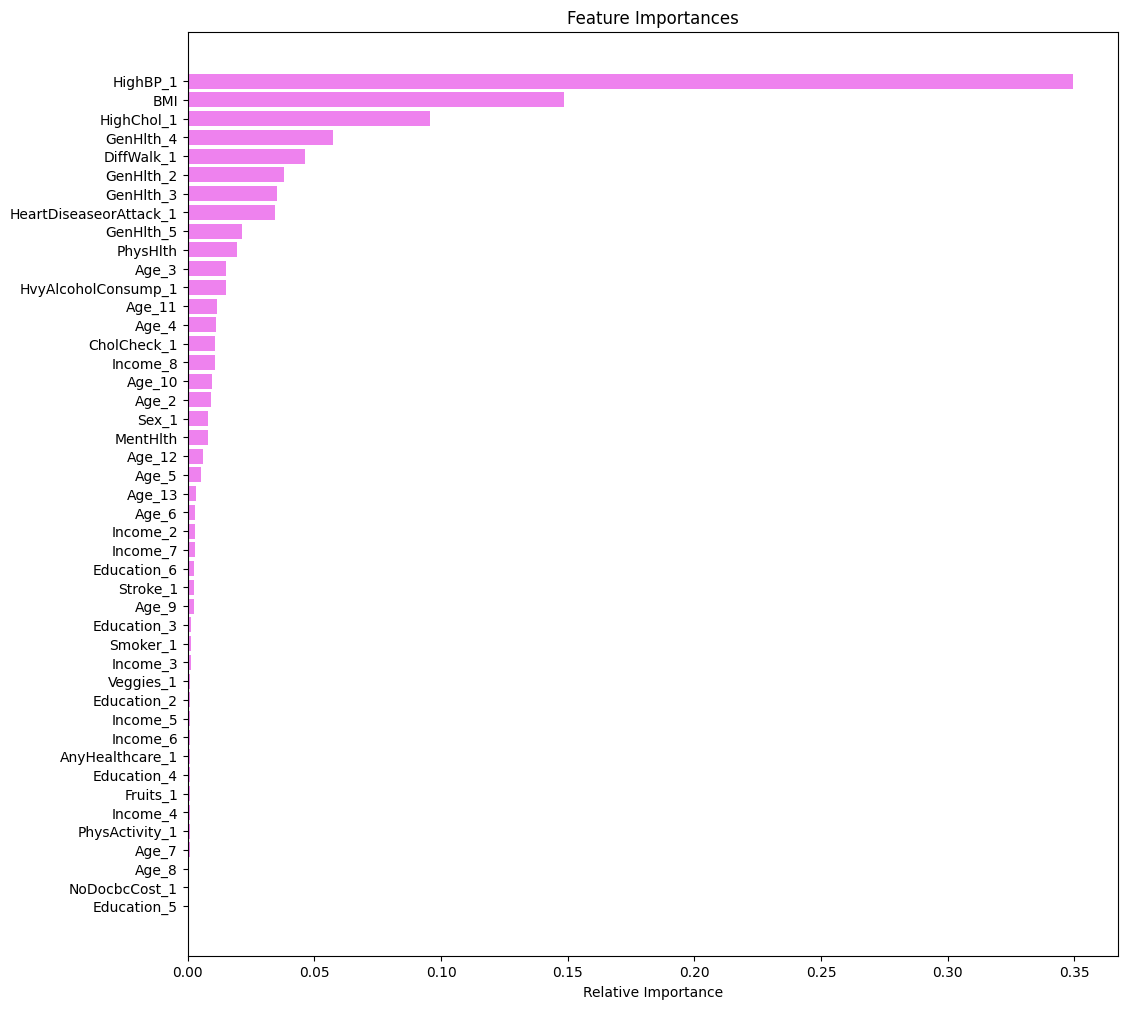

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#**Conclusions and Recommendations**

1. The model can predict with a recall (similar term in health data is sensitivity) of 0.784	and overall accuracy of 0.743. Model is well generalized and we get the validation recall of 0.774 and accuracy of 0.707. On test data it gives a reacll of 0.780 and an accuracy of 0.711.

2. We can improve the model further by hypertuning or feature engineering.

2. The most important features deciding a person will have diabetes are high BP, BMI, high cholesterol,  general health, difficulty walk in order.

#**Appendix- Detailed Exploratory Data Analysis**

*   It is best practice to perform univariate analysis on each attribute first.
*   Then we can do bivariate analysis to see the relationships between each attribute with the target attribute, in this case the "Diabetic".



## **Univariate Analysis**

**Observations on target variable 'Diabetic'**

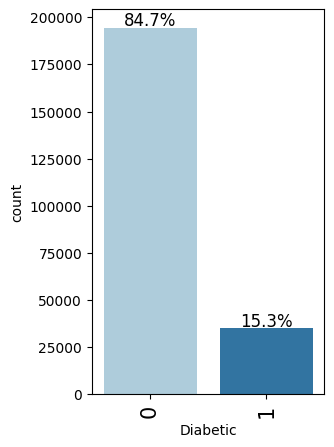

In [ ]:
labeled_barplot(data, 'Diabetic');

**Observations on HighBP**

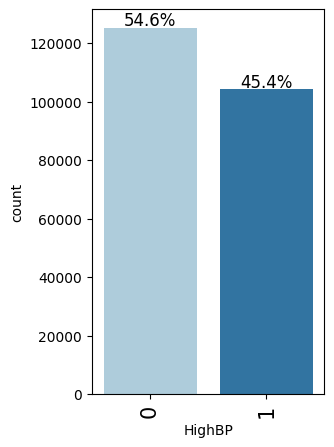

In [ ]:
labeled_barplot(data, 'HighBP');

**Observations of HighChol**

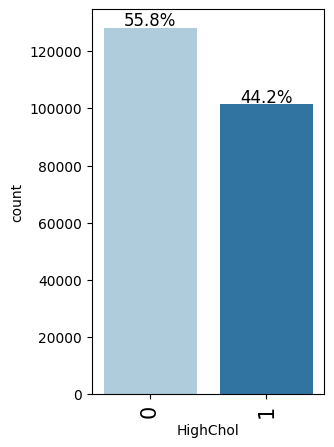

In [ ]:
labeled_barplot(data, 'HighChol');

**Observations on CholCheck**

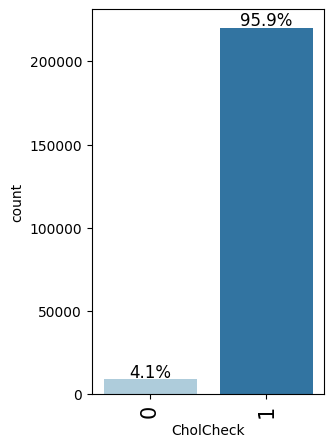

In [ ]:
labeled_barplot(data, 'CholCheck');

**Observations on Smoker**

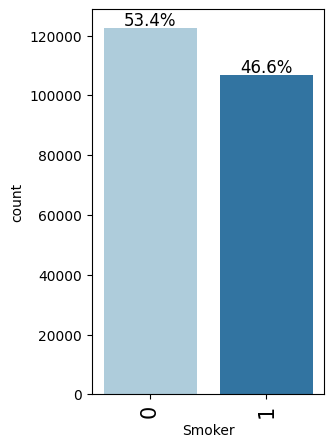

In [ ]:
labeled_barplot(data,"Smoker")

**Observations on Stroke**

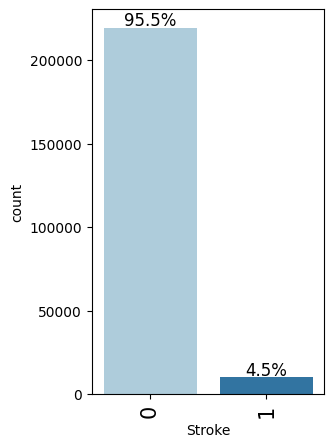

In [ ]:
labeled_barplot(data,"Stroke")

**Observations on HeartDiseaseorAttack**

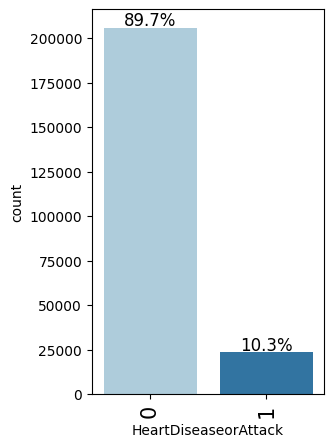

In [ ]:
labeled_barplot(data,"HeartDiseaseorAttack")

**Observations on PhysActivity**

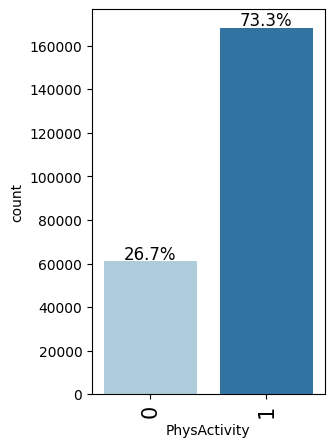

In [ ]:
labeled_barplot(data,"PhysActivity")

**Observations on Fruits**

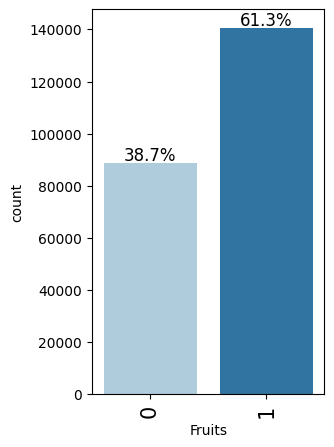

In [ ]:
labeled_barplot(data,"Fruits")

**Observations on Veggies**

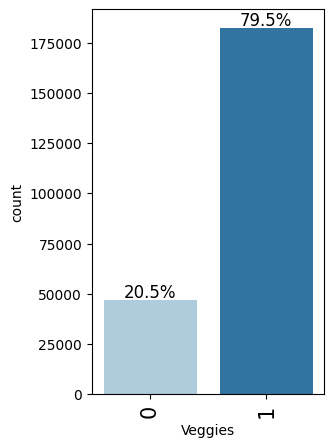

In [ ]:
labeled_barplot(data,"Veggies",perc=True)

**Observations on HvyAlcoholConsump**

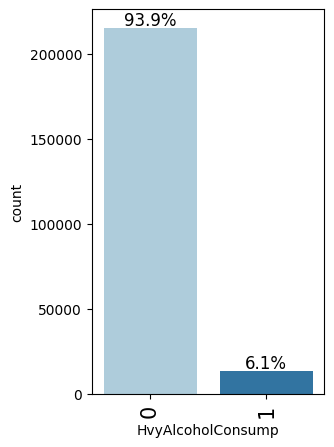

In [ ]:
labeled_barplot(data,"HvyAlcoholConsump",perc=True)

**Observations on AnyHealthcare**

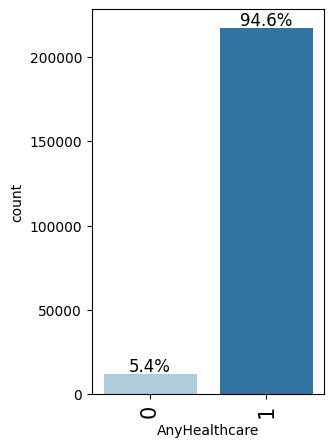

In [ ]:
labeled_barplot(data,"AnyHealthcare")

**Observations on NoDocbcCost**

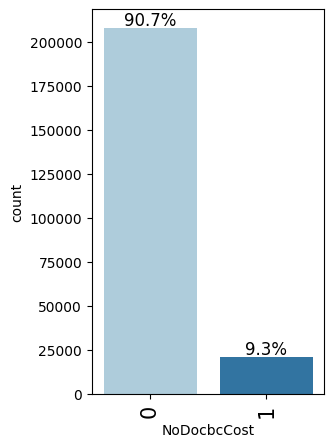

In [ ]:
labeled_barplot(data,"NoDocbcCost")

**Observations on GenHlth**

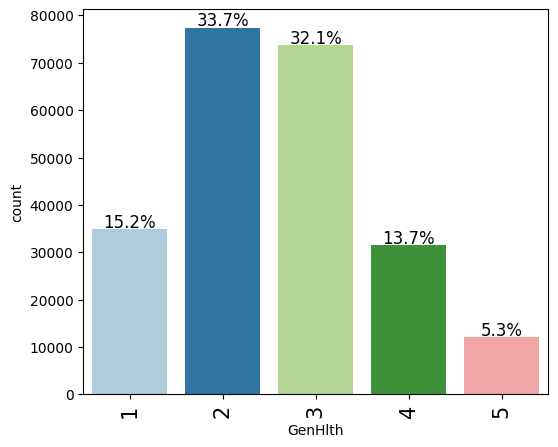

In [ ]:
labeled_barplot(data,"GenHlth")

**Observations on DiffWalk**

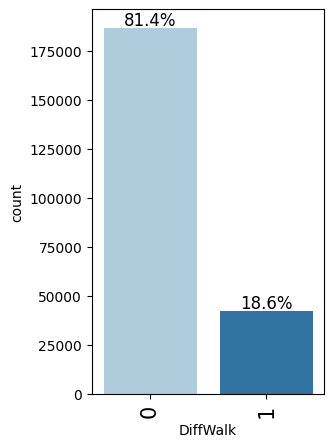

In [ ]:
labeled_barplot(data,"DiffWalk")

**Observations on Sex**

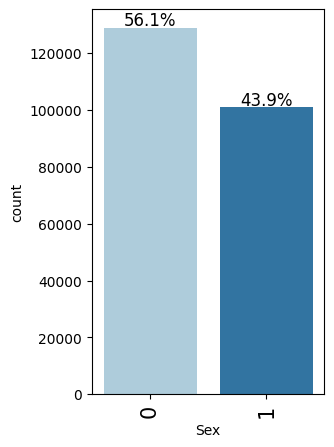

In [ ]:
labeled_barplot(data,"Sex")

**Observations on Age**

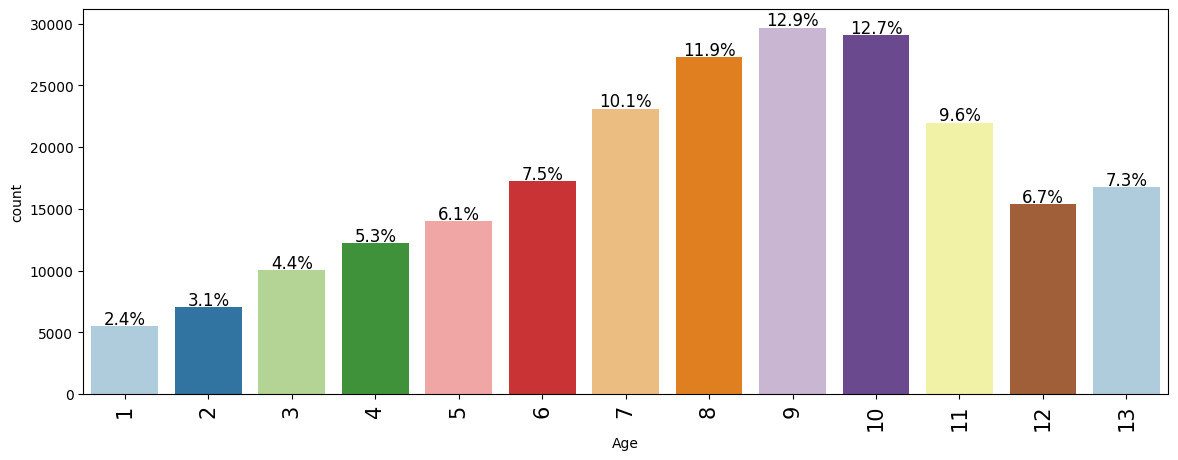

In [ ]:
labeled_barplot(data,"Age")

**Observations on Education**

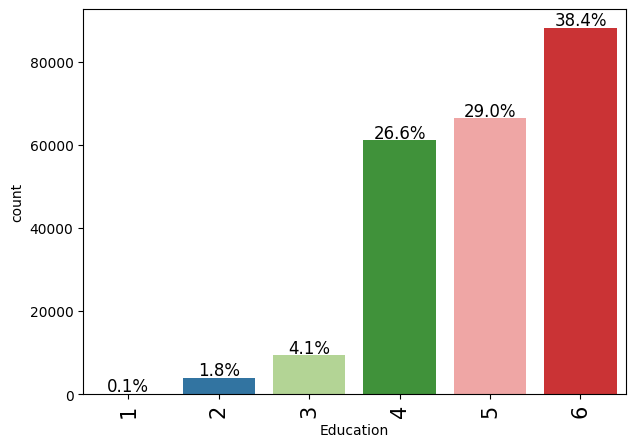

In [ ]:
labeled_barplot(data,"Education")

**Observations on Income**

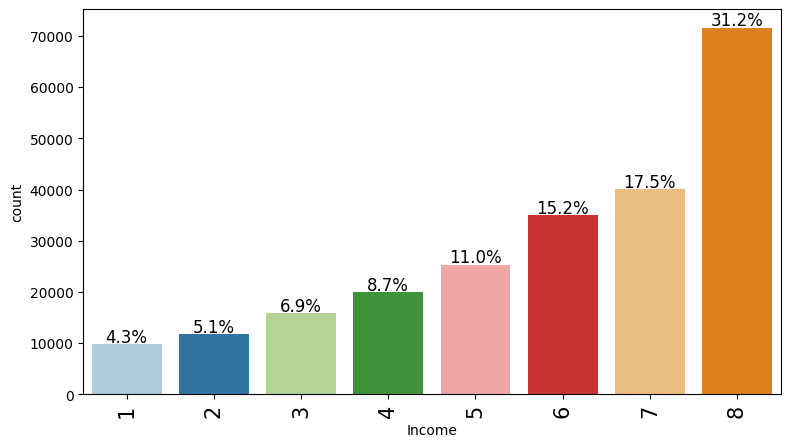

In [ ]:
labeled_barplot(data,"Income")

**Observations on BMI**

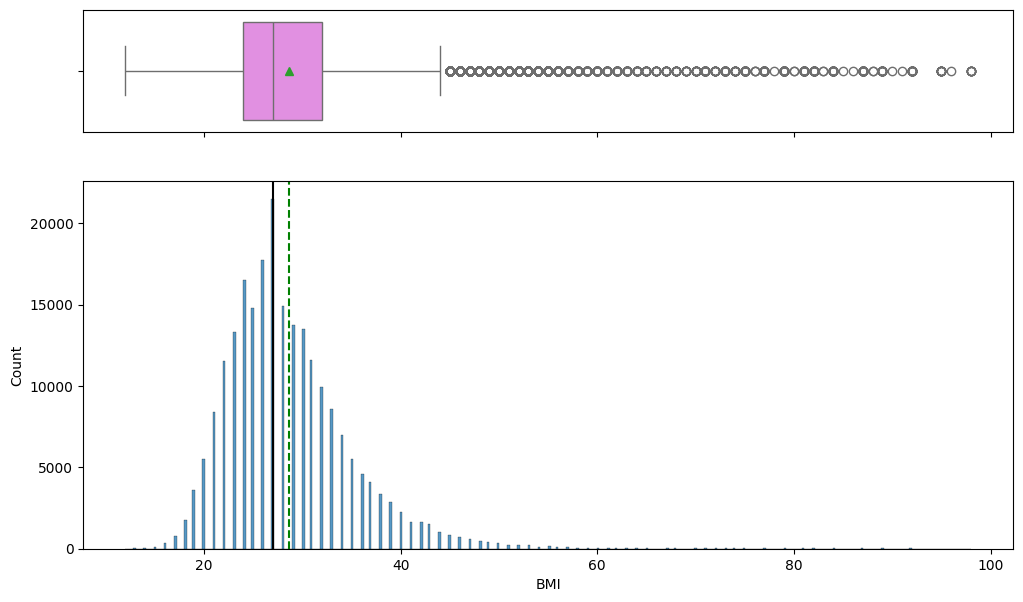

In [ ]:
histogram_boxplot(data,"BMI")

**Observations on MentHlth**

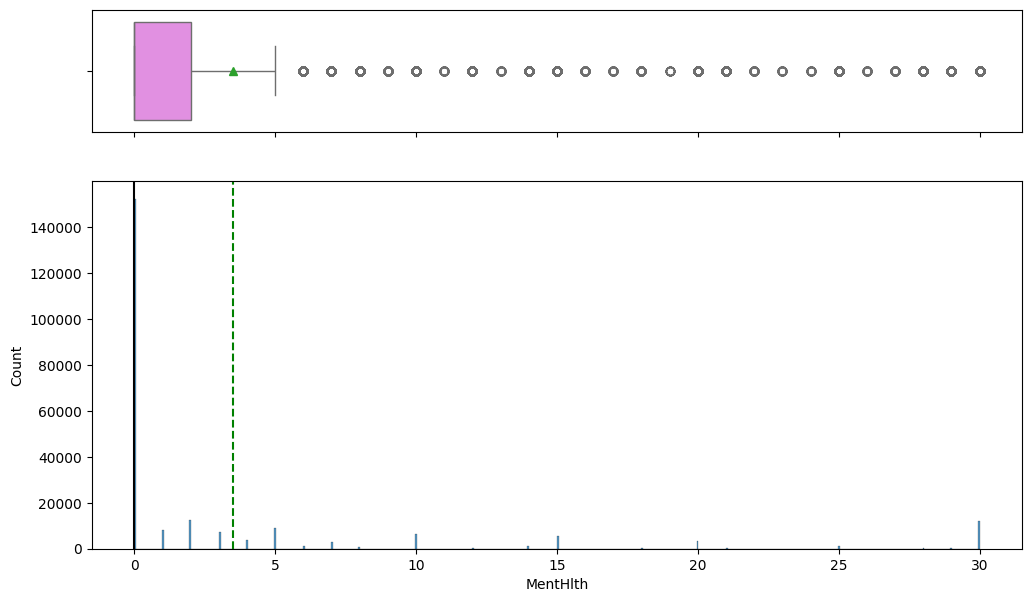

In [ ]:
histogram_boxplot(data,"MentHlth")

**Observations on PhysHlth**

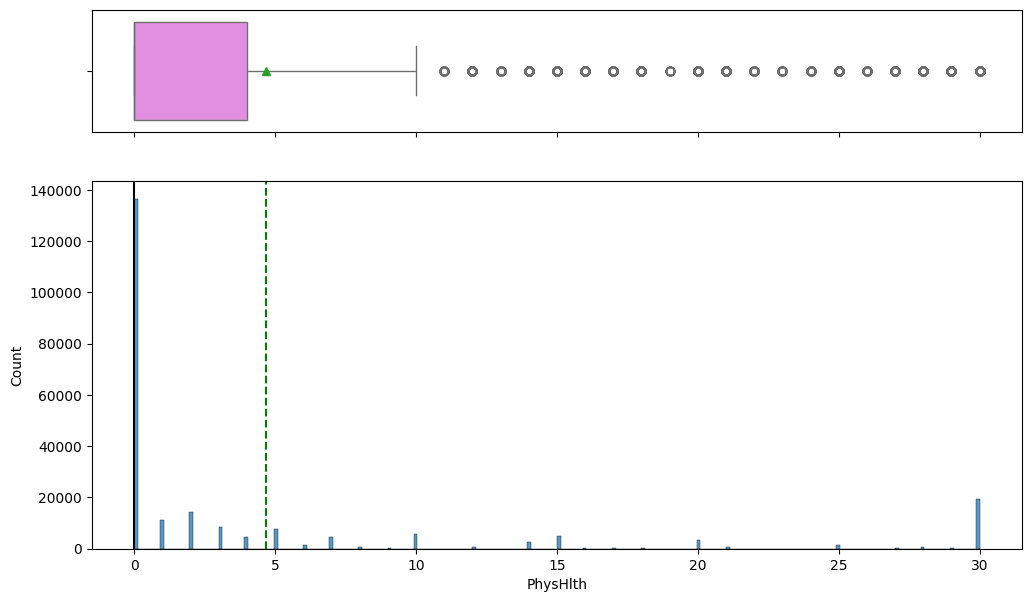

In [ ]:
histogram_boxplot(data,"PhysHlth")

## **Bivariate Analysis**

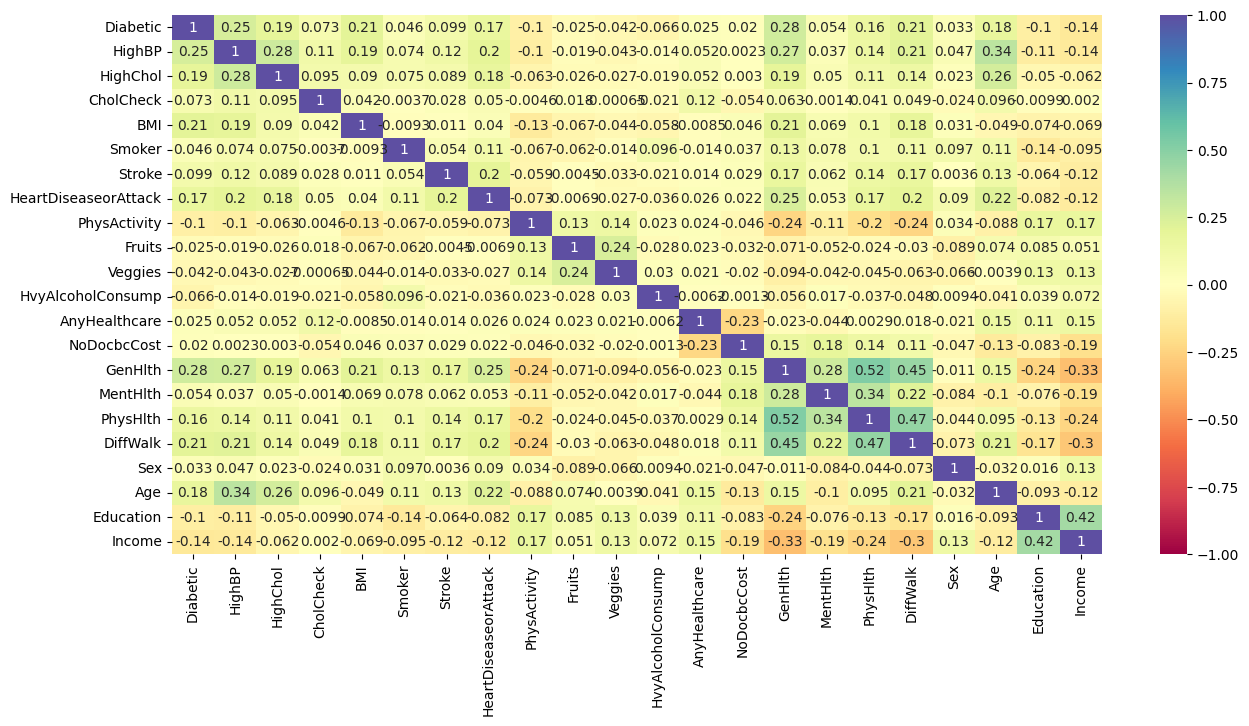

In [ ]:
# Let's see if we can find any existing correlations between attributes
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

**Observations-**
* Dependent variable class shows a moderate correlation with 'Glucose'.
* There is a positive correlation between age and the number of pregnancies which makes sense.
* Insulin and skin thickness also shows a moderate positive correlation.

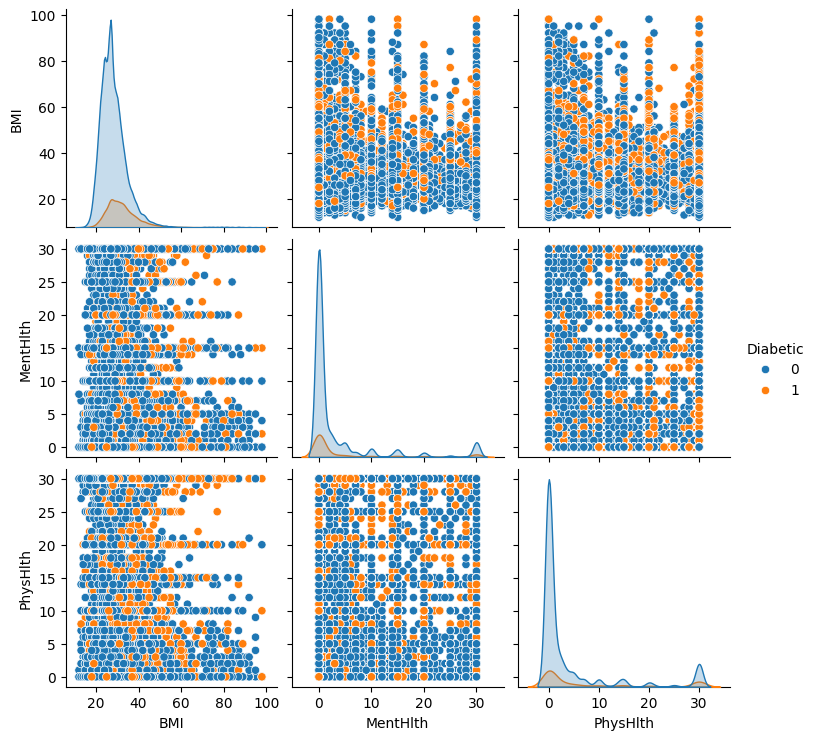

In [ ]:
# Pairplot is very useful in identifying distributions of numerical attributes with the target variable.
sns.pairplot(data=data,hue="Diabetic")
plt.show()

In [ ]:
data.columns

Index(['Diabetic', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

**Diabetic vs HighBP**

Diabetic       0      1     All
HighBP                         
All       194377  35097  229474
1          77855  26405  104260
0         116522   8692  125214
------------------------------------------------------------------------------------------------------------------------


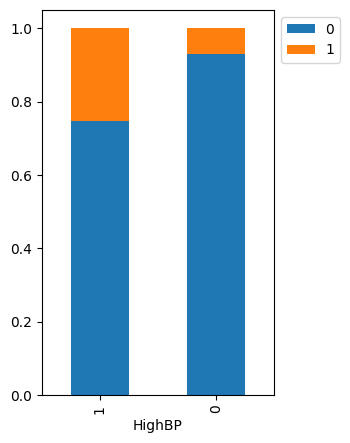

In [ ]:
stacked_barplot(data, 'HighBP', 'Diabetic');

**Diabetic vs HighChol**

Diabetic       0      1     All
HighChol                       
All       194377  35097  229474
1          77849  23496  101345
0         116528  11601  128129
------------------------------------------------------------------------------------------------------------------------


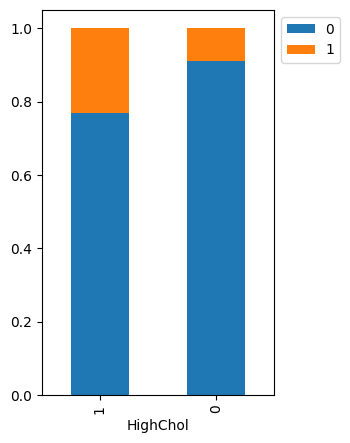

In [ ]:
stacked_barplot(data, 'HighChol', 'Diabetic');

**Diabetic vs CholCheck**

Diabetic        0      1     All
CholCheck                       
All        194377  35097  229474
1          185320  34856  220176
0            9057    241    9298
------------------------------------------------------------------------------------------------------------------------


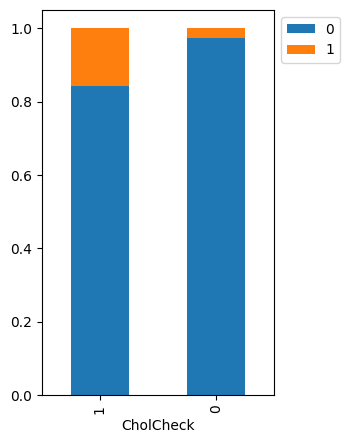

In [ ]:
stacked_barplot(data, 'CholCheck', 'Diabetic');

**Diabetic vs Smoker**

Diabetic       0      1     All
Smoker                         
All       194377  35097  229474
1          88666  18223  106889
0         105711  16874  122585
------------------------------------------------------------------------------------------------------------------------


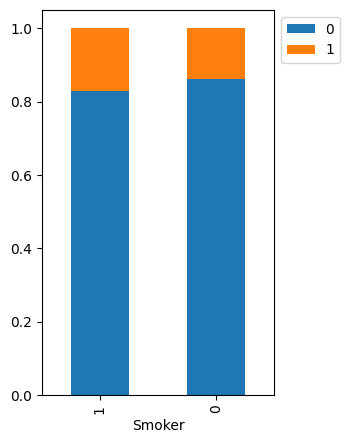

In [ ]:
stacked_barplot(data, 'Smoker', 'Diabetic');

**Diabetic vs Stroke**

Diabetic       0      1     All
Stroke                         
All       194377  35097  229474
0         187361  31829  219190
1           7016   3268   10284
------------------------------------------------------------------------------------------------------------------------


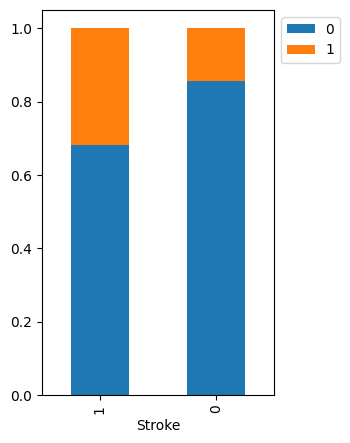

In [ ]:
stacked_barplot(data,'Stroke', 'Diabetic');

**Diabetic vs HeartDiseaseorAttack**

Diabetic                   0      1     All
HeartDiseaseorAttack                       
All                   194377  35097  229474
0                     178520  27241  205761
1                      15857   7856   23713
------------------------------------------------------------------------------------------------------------------------


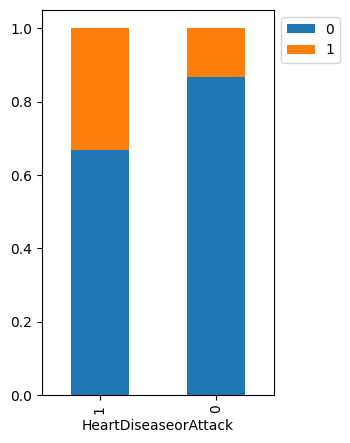

In [ ]:
stacked_barplot(data, 'HeartDiseaseorAttack','Diabetic');

**Diabetic vs PhysActivity**

Diabetic           0      1     All
PhysActivity                       
All           194377  35097  229474
1             146155  22059  168214
0              48222  13038   61260
------------------------------------------------------------------------------------------------------------------------


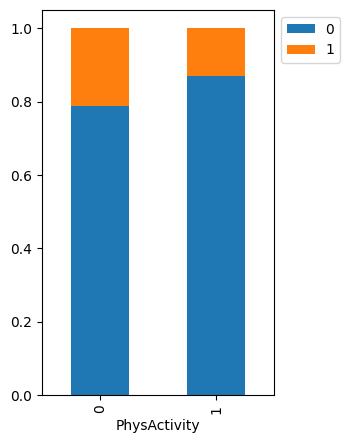

In [ ]:
stacked_barplot(data, 'PhysActivity', 'Diabetic');

**Diabetic vs Fruits**

Diabetic       0      1     All
Fruits                         
All       194377  35097  229474
1         120088  20505  140593
0          74289  14592   88881
------------------------------------------------------------------------------------------------------------------------


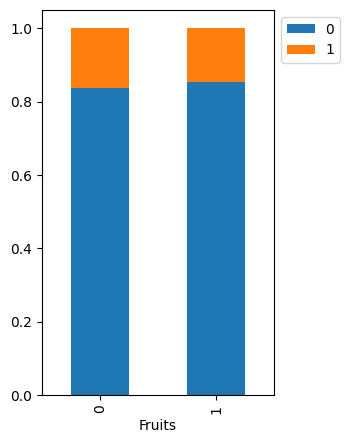

In [ ]:
stacked_barplot(data, 'Fruits', 'Diabetic' );

**Diabetic vs Veggies**

Diabetic       0      1     All
Veggies                        
All       194377  35097  229474
1         155842  26495  182337
0          38535   8602   47137
------------------------------------------------------------------------------------------------------------------------


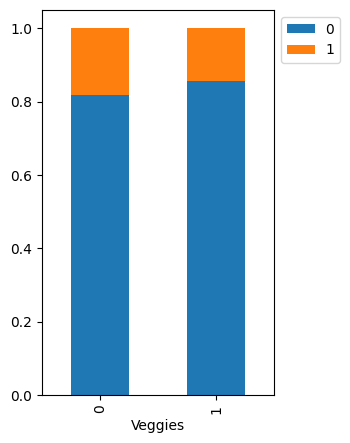

In [ ]:
stacked_barplot(data, 'Veggies', 'Diabetic');

**Diabetic vs HvyAlcoholConsump**

Diabetic                0      1     All
HvyAlcoholConsump                       
All                194377  35097  229474
0                  181259  34265  215524
1                   13118    832   13950
------------------------------------------------------------------------------------------------------------------------


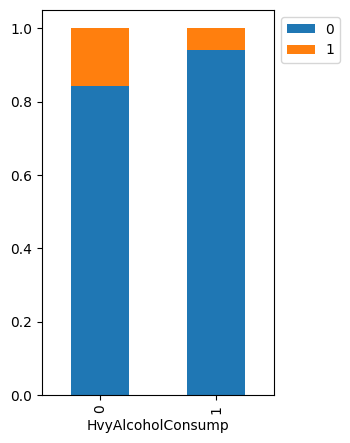

In [ ]:
stacked_barplot(data, 'HvyAlcoholConsump', 'Diabetic');

**Diabetic vs AnyHealthcare**

Diabetic            0      1     All
AnyHealthcare                       
All            194377  35097  229474
1              183410  33675  217085
0               10967   1422   12389
------------------------------------------------------------------------------------------------------------------------


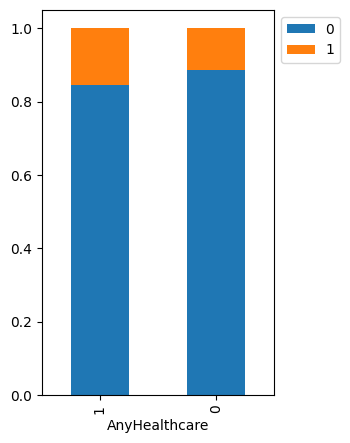

In [ ]:
stacked_barplot(data, 'AnyHealthcare', 'Diabetic');

**Diabetic vs NoDocbcCost**

Diabetic          0      1     All
NoDocbcCost                       
All          194377  35097  229474
0            176796  31355  208151
1             17581   3742   21323
------------------------------------------------------------------------------------------------------------------------


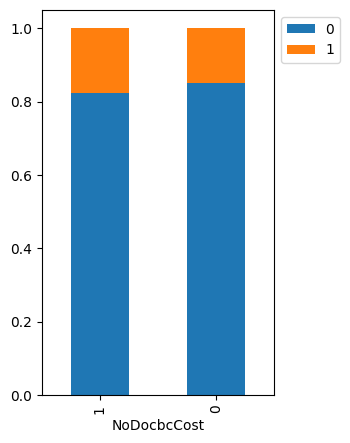

In [ ]:
stacked_barplot(data, 'NoDocbcCost', 'Diabetic');

**Diabetic vs GenHlth**

Diabetic       0      1     All
GenHlth                        
All       194377  35097  229474
3          60308  13324   73632
4          21764   9781   31545
2          71085   6280   77365
5           7501   4577   12078
1          33719   1135   34854
------------------------------------------------------------------------------------------------------------------------


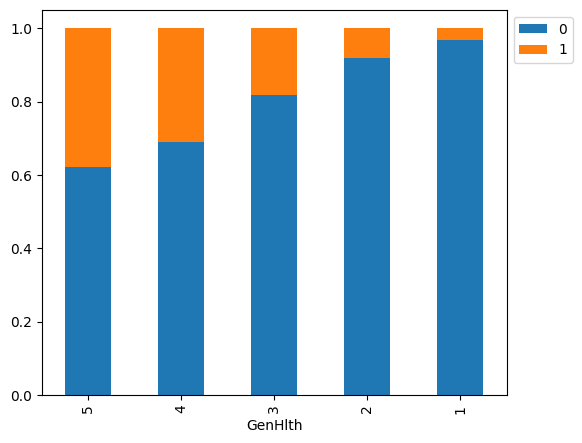

In [ ]:
stacked_barplot(data, 'GenHlth', 'Diabetic');

**Diabetic vs DiffWalk**

Diabetic       0      1     All
DiffWalk                       
All       194377  35097  229474
0         164866  21983  186849
1          29511  13114   42625
------------------------------------------------------------------------------------------------------------------------


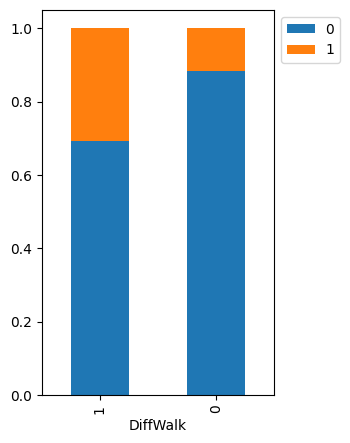

In [ ]:
stacked_barplot(data, 'DiffWalk', 'Diabetic');

**Diabetic vs Sex**

Diabetic       0      1     All
Sex                            
All       194377  35097  229474
0         110370  18345  128715
1          84007  16752  100759
------------------------------------------------------------------------------------------------------------------------


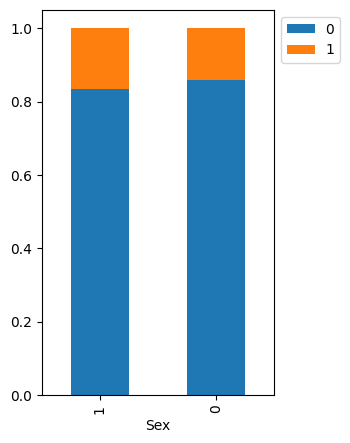

In [ ]:
stacked_barplot(data, 'Sex', 'Diabetic');

**Diabetic vs Age**

Diabetic       0      1     All
Age                            
All       194377  35097  229474
10         22610   6483   29093
9          23997   5681   29678
11         16903   5090   21993
8          23031   4241   27272
12         11996   3383   15379
13         13591   3200   16791
7          20049   3072   23121
6          15539   1741   17280
5          12991   1049   14040
4          11604    625   12229
3           9709    314   10023
2           6924    140    7064
1           5433     78    5511
------------------------------------------------------------------------------------------------------------------------


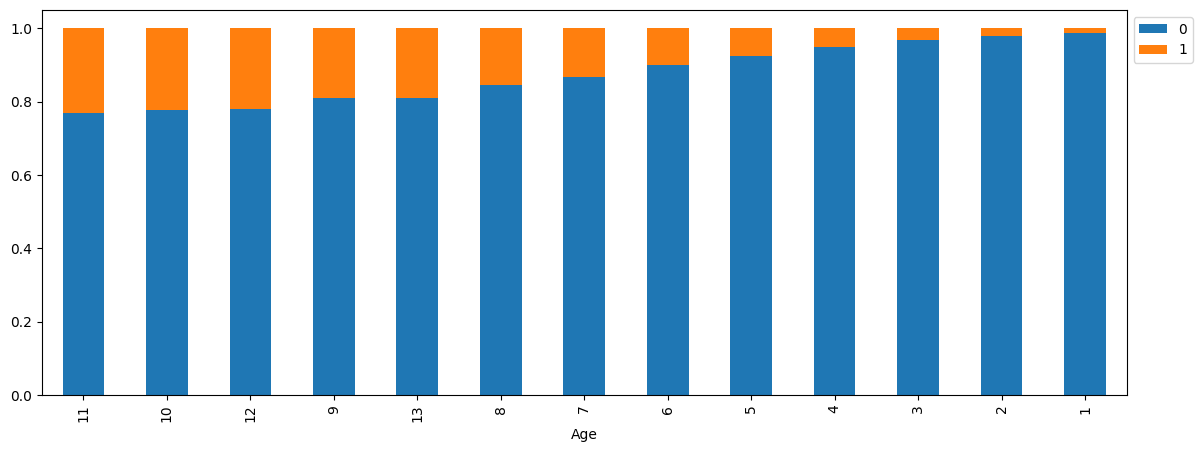

In [ ]:
stacked_barplot(data, 'Age', 'Diabetic');

**Diabetic vs Education**

Diabetic        0      1     All
Education                       
All        194377  35097  229474
4           50092  11032   61124
5           56133  10311   66444
6           77997  10228   88225
3            7171   2296    9467
2            2857   1183    4040
1             127     47     174
------------------------------------------------------------------------------------------------------------------------


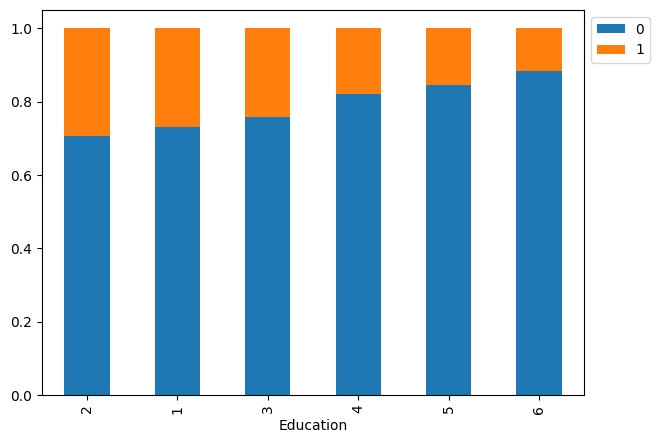

In [ ]:
stacked_barplot(data, 'Education', 'Diabetic');

**Diabetic vs Income**

Diabetic       0      1     All
Income                         
All       194377  35097  229474
8          64598   7042   71640
6          29697   5260   34957
7          34905   5226   40131
5          20837   4489   25326
4          15906   4047   19953
3          12356   3564   15920
2           8670   3086   11756
1           7408   2383    9791
------------------------------------------------------------------------------------------------------------------------


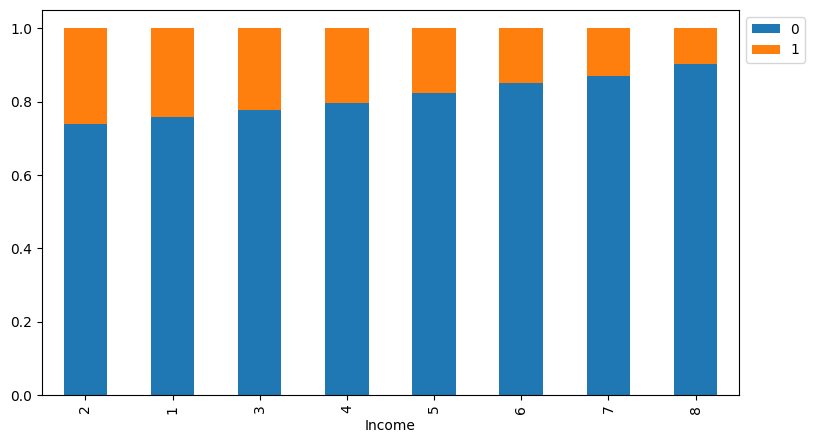

In [ ]:
stacked_barplot(data, 'Income', 'Diabetic');

**Diabetic vs BMI**

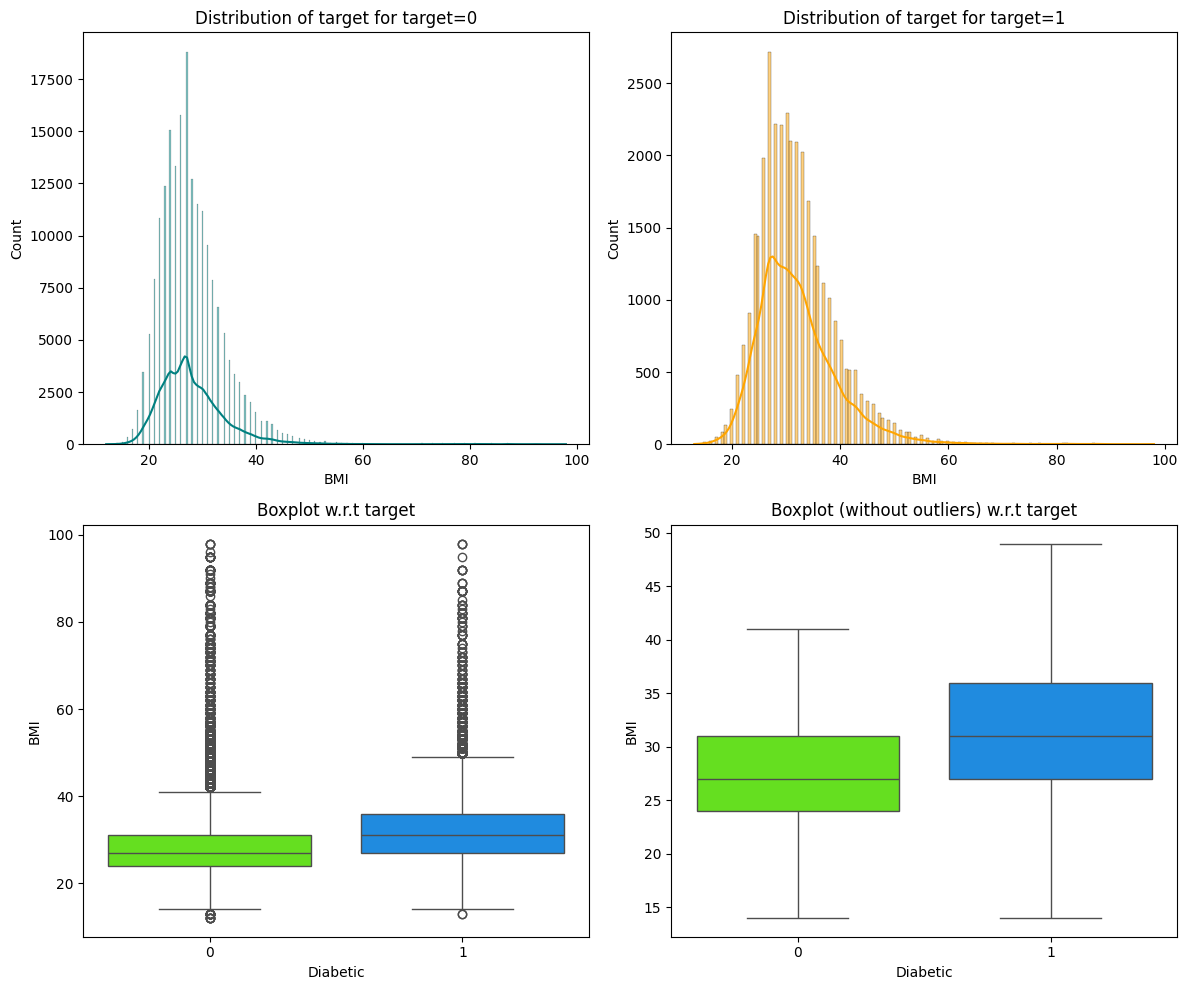

In [ ]:
distribution_plot_wrt_target(data, 'BMI', 'Diabetic');

**Diabetic vs MentHlth**

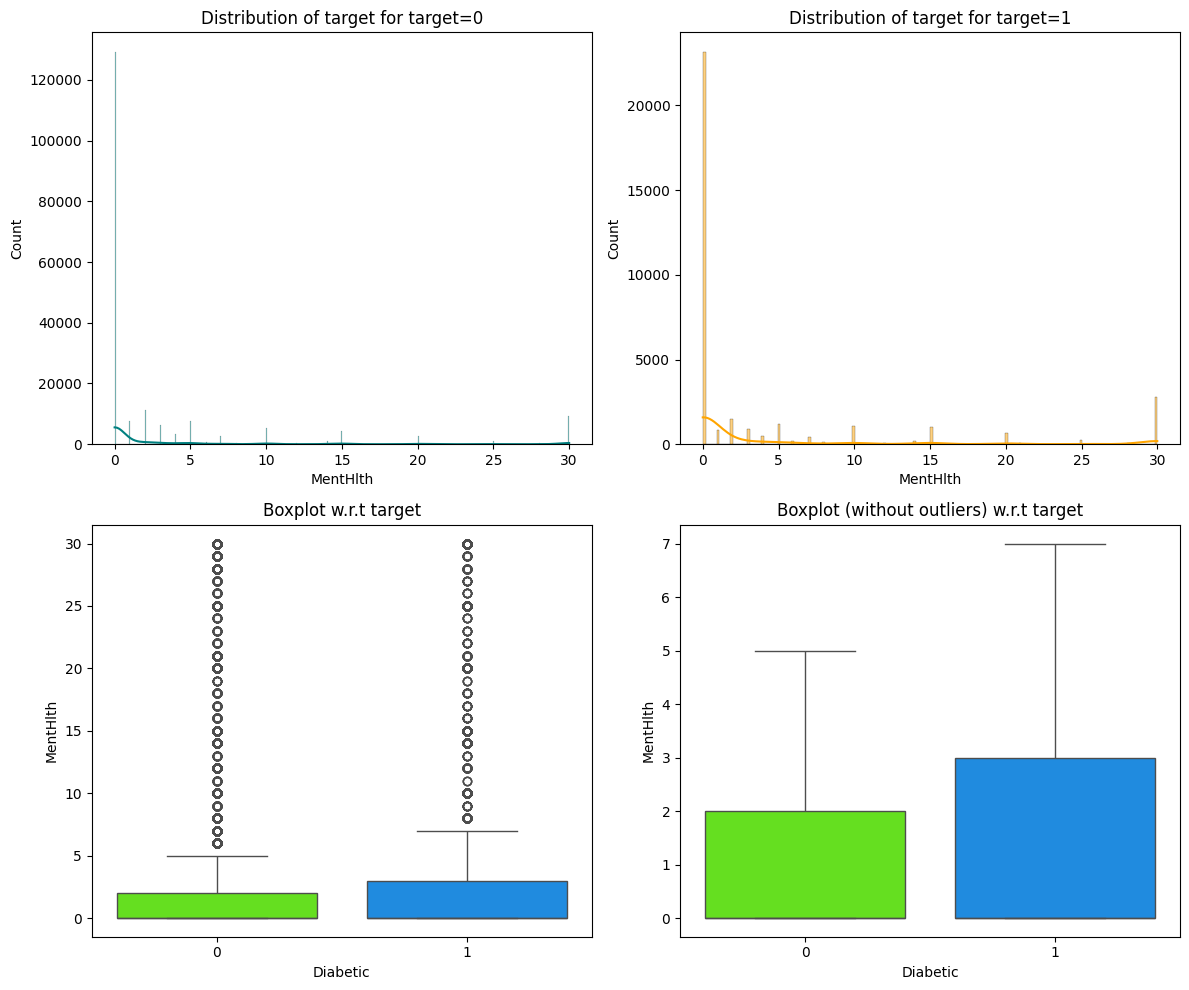

In [ ]:
distribution_plot_wrt_target(data, 'MentHlth', 'Diabetic');

**Diabetic vs PhysHlth**

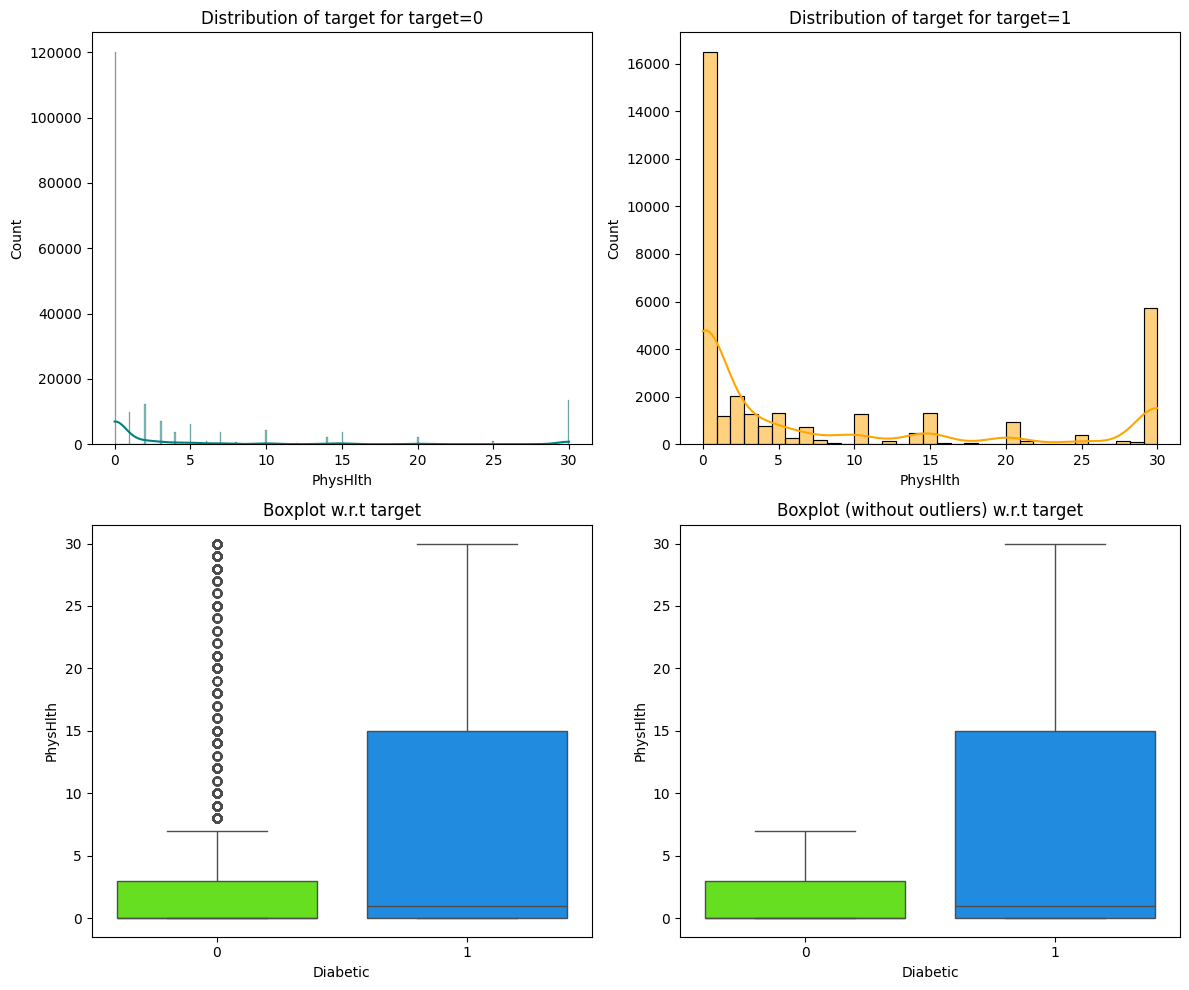

In [ ]:
distribution_plot_wrt_target(data,  'PhysHlth', 'Diabetic');